# #Dependencies

In [9]:
# Dependencies and Setup
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import requests
import gmaps
import os

from scipy.stats import linregress
from IPython.display import display, HTML
from Config import google_key

CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

#Pull in csv from total yearly rent vs. income
path = ("../output_data/rental(total)_income_merged.csv")
merged = pd.read_csv(path)
merged.head()

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689


In [10]:
merged.shape

,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,16856.937500,17063.250000,17859.437500,206.312500,796.187500,58851.708333,60390.791667,61673.604167,1539.083333,1282.812500
std,5713.597884,5704.590319,5943.665825,559.161879,850.015761,9800.163203,9543.978344,9767.832626,2650.276058,2801.038285
min,10740.000000,11100.000000,11400.000000,-1050.000000,-630.000000,41426.000000,41983.000000,43441.000000,-5050.000000,-5120.000000
25%,12926.250000,12660.000000,13191.000000,-63.750000,240.000000,52525.750000,54859.500000,55181.500000,-51.250000,-191.500000
50%,14827.500000,15000.000000,15735.000000,210.000000,675.000000,57490.000000,58879.000000,59988.000000,2144.000000,1515.500000
75%,19270.500000,19920.000000,20475.000000,468.750000,1200.000000,66070.000000,68285.500000,71299.500000,3215.750000,2898.750000
max,37200.000000,36570.000000,38700.000000,1500.000000,3060.000000,78299.000000,77900.000000,83382.000000,7537.000000,10874.000000


r-squared:0.5589543491674024


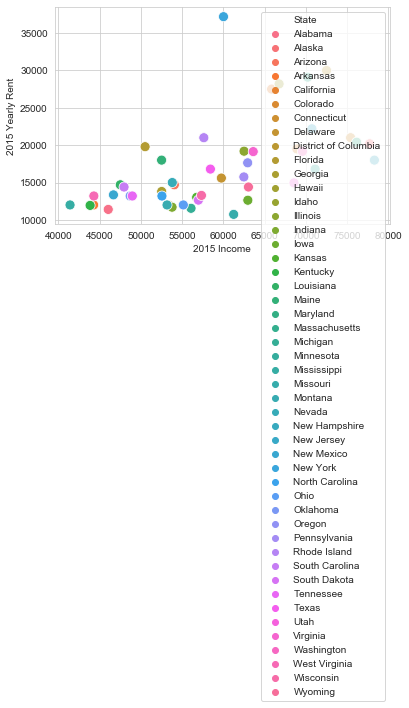

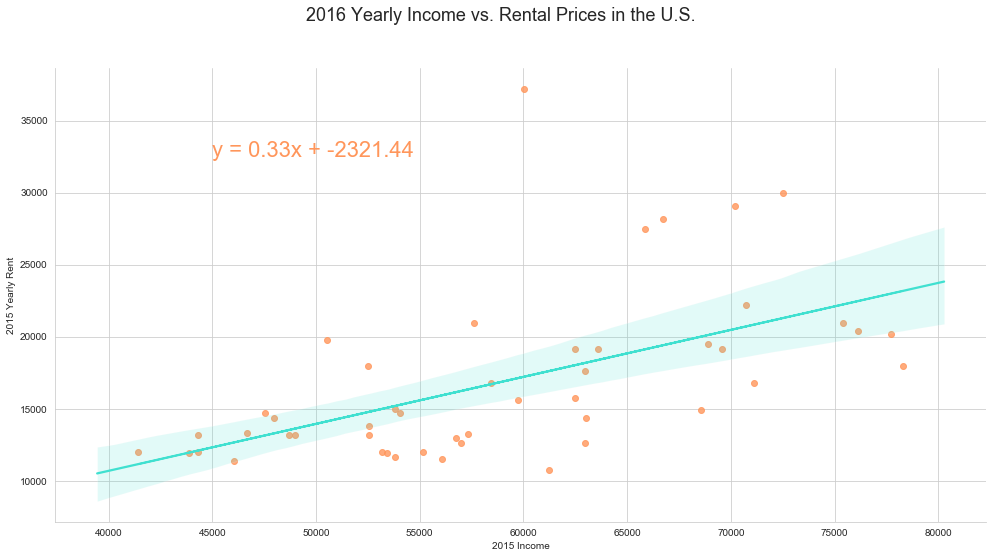

In [43]:
#Linear regression of all states 2016 (rent vs income)
x_values = merged["2015 Income"].astype('float')
y_values = merged["2015 Yearly Rent"].astype('float')

states = merged.State
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig_2015 = sns.lmplot(x='2015 Income', y='2015 Yearly Rent', data=merged, height = 7, aspect = 2, 
          scatter_kws={"color": "#ff965b"}, 
           line_kws={"color": "#40e0d0", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.plot(x_values, regress_values, '#40e0d0')
plt.annotate(line_eq,(45000,32500),fontsize=22,color="#ff965b")
fig_2015.fig.suptitle("2016 Yearly Income vs. Rental Prices in the U.S.", y=1.1,size=18)
print(f"r-squared:{rvalue}")

Text(45000, 30000, 'y = 0.33x + -2321.44')

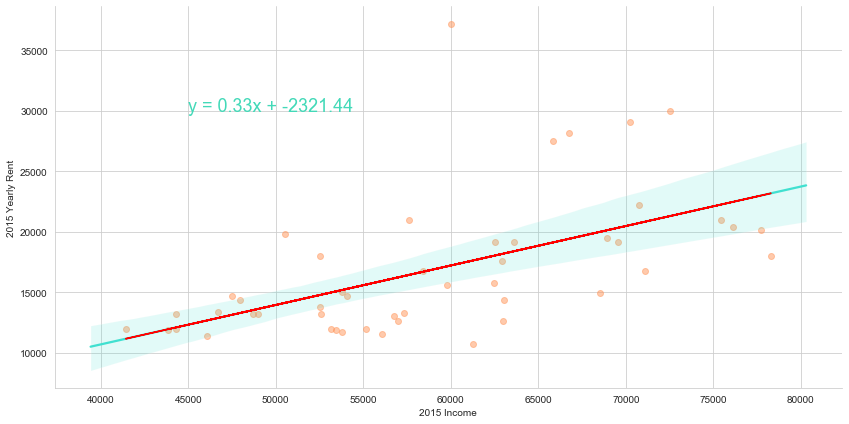

In [12]:
#Linear regression of all states 2016 (rent vs income)
x_values = merged["2016 Income"].astype('float')
y_values = merged["2016 Yearly Rent"].astype('float')

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig_2015 = sns.lmplot(x='2016 Income', y='2016 Yearly Rent', data=merged, height = 7, aspect = 2,
          scatter_kws={"color": "#ff965b"}, 
           line_kws={"color": "#40e0d0", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, truncate=True)
plt.plot(x_values, regress_values, '#40e0d0')
plt.annotate(line_eq,(45000,32500),fontsize=22,color="#ff965b")
fig_2015.fig.suptitle("2016 Yearly Income vs. Rental Prices in the U.S.", y=1.1,size=18)
print(f"r-squared:{rvalue}")

The r-squared: 0.5589543491674024


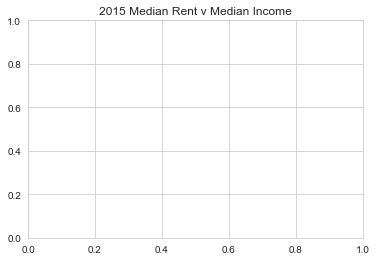

In [13]:
#Linear regression of all states 2016 (rent vs income)
x_values = merged["2015 Income"].astype('float')
y_values = merged["2015 Yearly Rent"].astype('float')

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig_2015 = sns.lmplot(x='2015 Income', y='2015 Yearly Rent', data=merged, height = 7, aspect = 2,
          scatter_kws={"color": "#ff965b"}, 
           line_kws={"color": "#40e0d0", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, truncate=True)
plt.plot(x_values, regress_values, '#40e0d0')
plt.annotate(line_eq,(45000,32500),fontsize=22,color="#ff965b")
fig_2015.fig.suptitle("2016 Yearly Income vs. Rental Prices in the U.S.", y=1.1,size=18)
print(f"r-squared:{rvalue}")

Text(0.5, 1, '2016 Median Rent v Median Income')

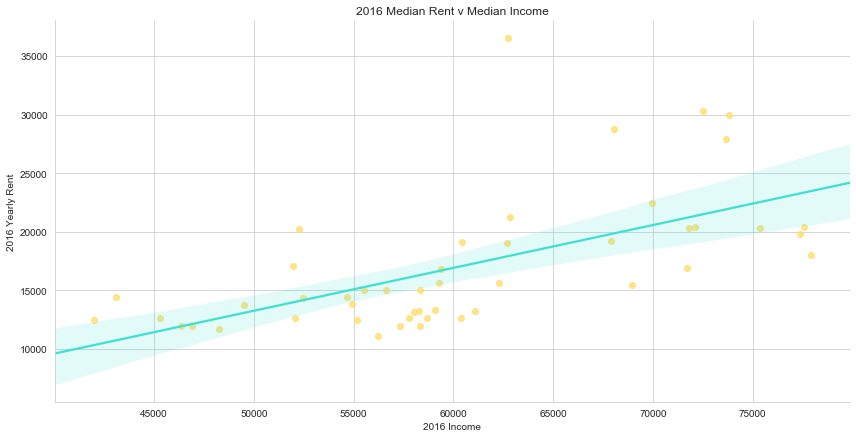

In [14]:
sns.lmplot(x='2016 Income', y='2016 Yearly Rent', data=merged, height = 6, aspect = 2, 
           scatter_kws={"color": "#ffdf6b"}, line_kws={"color": "#40e0d0"});
plt.title('2016 Median Rent v Median Income')